In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import string
import nltk
import re

In [2]:
dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
dataset_encode = "ISO-8859-1"
df=pd.read_csv("/content/training.1600000.processed.noemoticon (1).csv", encoding = dataset_encode,names=dataset_columns)

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [5]:
df['target'].value_counts()

target
4    10001
0     9999
Name: count, dtype: int64

In [6]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['clean_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [8]:
#tokenization
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text)
    return split
df['clean_text_tokenize']=df['clean_text'].apply(lambda x: tokenize(x.lower()))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# #stopwords
# nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['clean_text_tokenize_stopwords'] = df['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
df.head(10)

,target,text,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats a b...,"[switchfoot, httptwitpiccom2y1zl, awww, thats,...","[switchfoot, httptwitpiccom2y1zl, awww, thats,..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire, ]"
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, behaving, im, mad, cant, see, ]"
5,0,@Kwesidei not the whole crew,Kwesidei not the whole crew,"[kwesidei, not, the, whole, crew, ]","[kwesidei, whole, crew, ]"
6,0,Need a hug,Need a hug,"[need, a, hug, ]","[need, hug, ]"
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,LOLTrish hey long time no see Yes Rains a bit...,"[loltrish, hey, long, time, no, see, yes, rain...","[loltrish, hey, long, time, see, yes, rains, b..."
8,0,@Tatiana_K nope they didn't have it,TatianaK nope they didnt have it,"[tatianak, nope, they, didnt, have, it, ]","[tatianak, nope, didnt, ]"
9,0,@twittera que me muera ?,twittera que me muera,"[twittera, que, me, muera, ]","[twittera, que, muera, ]"


In [11]:
new_df = pd.DataFrame()
new_df['text'] = df['clean_text']
new_df['label'] = df['target']
new_df['label'] = new_df['label'].replace(4,1)

In [12]:
print(new_df.head())
print('Label: \n', new_df['label'].value_counts())


                                                text  label
0  switchfoot httptwitpiccom2y1zl  Awww thats a b...      0
1  is upset that he cant update his Facebook by t...      0
2  Kenichan I dived many times for the ball Manag...      0
3    my whole body feels itchy and like its on fire       0
4  nationwideclass no its not behaving at all im ...      0
Label: 
 label
1    10001
0     9999
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
X = new_df['text']
y = new_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19000,) (1000,) (19000,) (1000,)


In [14]:
y_train.value_counts()

label
1    9512
0    9488
Name: count, dtype: int64

In [15]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [17]:
validation = model.predict(X_test)

In [18]:
validation1 = model.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, validation1)

0.910157894736842

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, validation)

0.778

<Axes: >

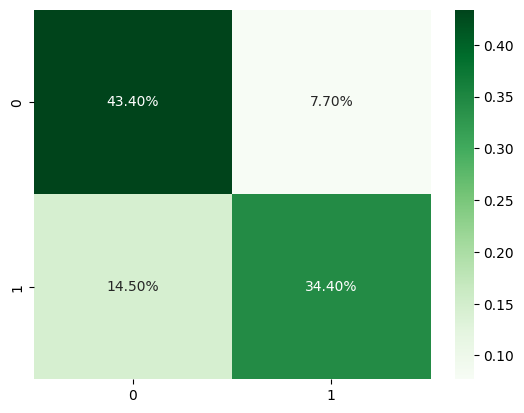

In [21]:
cf_matrix = confusion_matrix(y_test, validation)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

In [22]:
print(classification_report(y_test, validation))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       511
           1       0.82      0.70      0.76       489

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [23]:
train = pd.DataFrame()
train['label'] = y_train
train['text'] = X_train

def predict_category(s, train=X_train, model=model):
    pred = model.predict([s])
    return pred[0]

In [24]:
predict_category("i wanna shot myself")

0

In [25]:
predict_category("i Kill you")

0

In [26]:
predict_category("I'm cute")

1

In [27]:
predict_category("I hate my self")

0

In [37]:
predict_category("I'm excited")

1

In [32]:
predict_category("I am struggling")

0